In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [7]:
label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
# convert class vectors to binary vectors
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

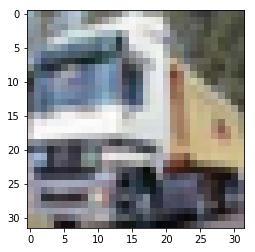

In [9]:
plt.imshow(X_train[1])

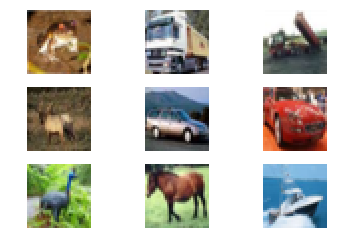

In [10]:
num = 9
  
for i in range(num):  
    plt.subplot(3, 3, i+1)  
    plt.imshow(X_train[i])  
    plt.axis("off")  
plt.show() 

In [11]:
min(y_train)

array([0], dtype=uint8)

In [12]:
X_train.min(), X_train.max()

(0, 255)

In [13]:
X_test.min(), X_test.max()

(0, 255)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
def grayscale(data, dtype='float32'):
    #luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

#X_train_gray = grayscale(X_train)
#X_test_gray = grayscale(X_test)

In [16]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [17]:
X_train_tr=X_train.reshape(50000,3072)
X_test_tr=X_test.reshape(10000,3072)

In [18]:
32*32*3


3072

# PCA

In [79]:
pca95 = PCA(0.95)
pca95.fit(X_train_tr)
x_train_transformed_95 = pca95.transform(X_train_tr)
x_test_transformed_95=pca95.transform(X_test_tr)

In [80]:
x_train_transformed_95.shape

(50000, 217)

In [19]:
pca90 = PCA(0.90)
pca90.fit(X_train_tr)
x_train_transformed_90 = pca90.transform(X_train_tr)
x_test_transformed_90=pca90.transform(X_test_tr)

In [20]:
x_train_transformed_90.shape

(50000, 99)

In [83]:
pca85 = PCA(0.85)
pca85.fit(X_train_tr)
x_train_transformed_85 = pca85.transform(X_train_tr)
x_test_transformed_85=pca85.transform(X_test_tr)

In [84]:
x_train_transformed_85.shape

(50000, 55)

In [85]:
pca80 = PCA(0.8)
pca80.fit(X_train_tr)
x_train_transformed_80 = pca80.transform(X_train_tr)
x_test_transformed_80=pca80.transform(X_test_tr)

In [86]:
x_train_transformed_80.shape

(50000, 33)

In [70]:
PCA_data=[217,99,55,33]

In [71]:
PCA_data=pd.DataFrame(PCA_data, columns=['# Dimensions'],index=['95% Variance','90% Variance','85% Variance','80% Variance'])

In [72]:
PCA_data

,# Dimensions
95% Variance,217
90% Variance,99
85% Variance,55
80% Variance,33


# SVM

In [24]:
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.pipeline import Pipeline

In [25]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [88]:
%time

pipe=Pipeline([
   ('dimension', PCA(svd_solver='randomized',whiten=True)),
    ('classifier', svm.SVC(kernel='rbf',class_weight='balanced'))
    
    
])

number_dimensions=[33,55,99,217]
C_op=[2**i for i in range(-4,6)]
gamma_op=[2**j for j in range(-8,3)]

parameter_grid=[{
    'dimension__n_components':number_dimensions
    #'classifier__C':C_op,
     #'classifier__gamma':gamma_op
      
}]

grid=GridSearchCV(pipe, cv=2, n_jobs=-1, param_grid=parameter_grid)
grid=grid.fit(X_train_tr,y_train)
print("Best parameters")
print(grid.best_estimator_)
print('----------------------')
print('best score found with grid search')
print('----------------------')


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 33.6 µs
Best parameters
Pipeline(memory=None,
     steps=[('dimension', PCA(copy=True, iterated_power='auto', n_components=99, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
----------------------
best score found with grid search
----------------------


In [93]:
test_error_linear_svm=[] 
for c in ([2**i for i in range(-4,4)]):
    SVM=OneVsOneClassifier(svm.SVC(kernel='linear',C=c))
    SVM.fit(x_train_transformed_90,y_train)
    x_test_pred=SVM.predict(x_test_transformed_90)
    error_svm=sum(x_test_pred!=y_test)/len(y_test)
    test_error_linear_svm.append(error_svm)
print(test_error_linear_svm)

[0.5927, 0.5935, 0.594, 0.5936, 0.5939, 0.5937, 0.5937, 0.5939]


In [94]:
test_error_poly=[] 
for c in ([2**i for i in range(-4,4)]):
    SVM=OneVsOneClassifier(svm.SVC(kernel='poly',C=c,gamma=1,coef0=1,degree=3))
    SVM.fit(x_train_transformed_90,y_train)
    x_test_pred=SVM.predict(x_test_transformed_90)
    error_svm=sum(x_test_pred!=y_test)/len(y_test)
    test_error_poly.append(error_svm)
print(test_error_poly)

[0.538, 0.538, 0.538, 0.538, 0.538, 0.538, 0.538, 0.538]


In [77]:
start=time.time()
SVM=OneVsOneClassifier(svm.SVC(kernel='poly',C=2**0,gamma=1,coef0=1,degree=3))
SVM.fit(x_train_transformed_90,y_train)
x_test_pred=SVM.predict(x_test_transformed_90)
error_svm=sum(x_test_pred!=y_test)/len(y_test)
test_error_poly.append(error_svm)
end=time.time()
print(end-start)

1432.2724258899689


In [2]:
#takes too much time to compute 
#test_error_poly_5=[] 
#for c in ([2**i for i in range(-4,4)]):
    #SVM=OneVsOneClassifier(svm.SVC(kernel='poly',C=c,gamma=1,coef0=1,degree=5))
    #SVM.fit(x_train_transformed_90,y_train)
    #x_test_pred=SVM.predict(x_test_transformed_90)
    #error_svm=sum(x_test_pred!=y_test)/len(y_test)
    #test_error_poly_5.append(error_svm)
#print(test_error_poly_5)

In [61]:
test_error_linear_svm=[0.5927, 0.5935, 0.594, 0.5936, 0.5939, 0.5937, 0.5937, 0.5939]
test_error_poly=[0.538, 0.538, 0.538, 0.538, 0.538, 0.538, 0.538, 0.538]




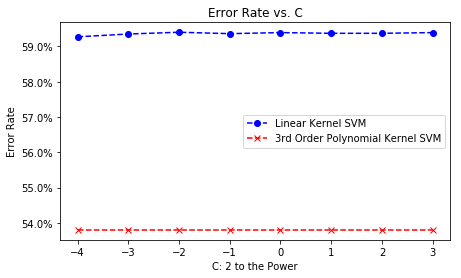

In [64]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

svm_linear,=plt.plot(range(-4,4),test_error_linear_svm,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
svm_quart,=plt.plot(range(-4,4),test_error_poly,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error Rate vs. C')
plt.xlabel('C: 2 to the Power')
plt.ylabel('Error Rate')

plt.legend([svm_linear,svm_quart],["Linear Kernel SVM","3rd Order Polynomial Kernel SVM"])

In [92]:
x_test_transformed_90.shape

(10000, 99)

In [ ]:
test_error_gaussian=[] 
for c in ([2**i for i in range(-4,1)]):
    for g in ([2**j for j in range(-4,-3)]):
        SVM=svm.SVC(kernel='rbf',C=c,gamma=g)
        SVM.fit(x_train_transformed_90,y_train)
        x_test_pred=SVM.predict(x_test_transformed_90)
        error=sum(x_test_pred!=y_test)/len(y_test)
        test_error_gaussian.append(error)
print(test_error_gaussian)

#  Logistic Regression

In [26]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [27]:
from sklearn.linear_model import LogisticRegression

In [76]:
start=time.time()
lg_ovo=OneVsOneClassifier(LogisticRegression())
lg_ovo.fit(x_train_transformed_90,y_train)
x_test_pred=lg_ovo.predict(x_test_transformed_90)
test_acc_lg_ovo=sum(x_test_pred!=y_test)/len(y_test)
end=time.time()
print(test_acc_lg_ovo)
print(end-start)

0.5941
27.399664163589478


In [34]:

lg_ovr=OneVsRestClassifier(LogisticRegression())
lg_ovr.fit(x_train_transformed_90,y_train)
x_test_pred=lg_ovr.predict(x_test_transformed_90)
test_acc_lg_ovr=sum(x_test_pred!=y_test)/len(y_test)
print(test_acc_lg_ovr)

0.5995


In [35]:
lr_mul = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_mul_fit = lr_mul.fit(x_train_transformed_90,y_train)
pred_lr_mul = lr_mul.predict(x_test_transformed_90)
acc_lr_mul = sum(pred_lr_mul!=y_test)/len(y_test)
print(acc_lr_mul)

0.5979


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [36]:
data=[test_acc_lg_ovo,test_acc_lg_ovr,acc_lr_mul]


In [38]:
data=pd.DataFrame(data, columns=['Test Error Logstic Regression'],index=['One-vs-One','One-vs-Rest','Multinomial Class'])

In [39]:
data

,Test Error
One-vs-One,0.5940
One-vs-Rest,0.5995
Multinomial Class,0.5979


In [132]:
data['Test Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['Test Error']], index = data.index)

In [133]:
data

,Test Error
One-vs-One,59.40%
One-vs-Rest,59.95%
Multinomial Class,59.79%


# KNN

In [40]:
distance_metrics=['cityblock', 'cosine', 'euclidean']
test_error=[[],[],[]]
p=0
for j in range(0,3):
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i,metric=distance_metrics[j])
        knn.fit(x_train_transformed_90, y_train)
        y_pred = knn.predict(x_test_transformed_90)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error[p].append(test_scores)
    p=p+1
print(test_error)

[[0.6278, 0.6717, 0.6431, 0.6371, 0.6372, 0.6371, 0.6369, 0.6405000000000001, 0.643, 0.6401], [0.5780000000000001, 0.6042000000000001, 0.5813999999999999, 0.5740000000000001, 0.5662, 0.5626, 0.5601, 0.5566, 0.5585, 0.5603], [0.6142000000000001, 0.6597999999999999, 0.6341, 0.624, 0.6192, 0.6222, 0.6187, 0.6158, 0.6154999999999999, 0.6134]]


In [41]:
neighbours=range(1,11)

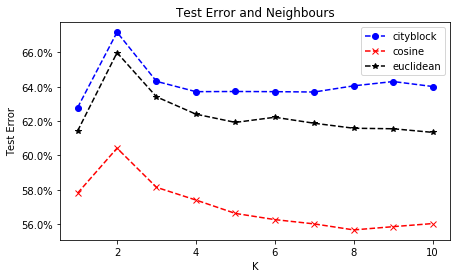

In [42]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

cityblock,=plt.plot(neighbours,test_error[0],color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
cosine,=plt.plot(neighbours,test_error[1],color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
euclidean,=plt.plot(neighbours,test_error[2],color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([cityblock,cosine,euclidean],["cityblock","cosine","euclidean"])

In [43]:
def squared_inverse(x):
    return(1/x**2)

In [44]:
def linear_weight(x):
        k=x.shape[1]
        x=x.transpose()
        weights=((x[k-1,:]-x)/(x[k-1,:]-x[0,:])).transpose()
        return weights

In [45]:
test_error_inverse_weight=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(x_train_transformed_90, y_train)
    y_pred = knn.predict(x_test_transformed_90)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_inverse_weight.append(test_scores)
print(test_error_inverse_weight)

[0.6142000000000001, 0.6142000000000001, 0.6102000000000001, 0.6023000000000001, 0.6029, 0.6009, 0.5988, 0.5991, 0.6001000000000001, 0.5968]


In [46]:
test_error_inverse_squared_weight=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,weights=squared_inverse)
    knn.fit(x_train_transformed_90, y_train)
    y_pred = knn.predict(x_test_transformed_90)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_inverse_squared_weight.append(test_scores)
print(test_error_inverse_squared_weight)

[0.6142000000000001, 0.6142000000000001, 0.6071, 0.5983, 0.5977, 0.5968, 0.5935, 0.5929, 0.5931, 0.5913999999999999]


In [47]:
test_error_linear_weight=[]
for i in range(2,12):
    knn = KNeighborsClassifier(n_neighbors=i,weights=linear_weight)
    knn.fit(x_train_transformed_90, y_train)
    y_pred = knn.predict(x_test_transformed_90)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_linear_weight.append(test_scores)
print(test_error_linear_weight)

[0.6142000000000001, 0.6142000000000001, 0.6088, 0.6039, 0.5998, 0.5966, 0.591, 0.5872999999999999, 0.5851, 0.5857]


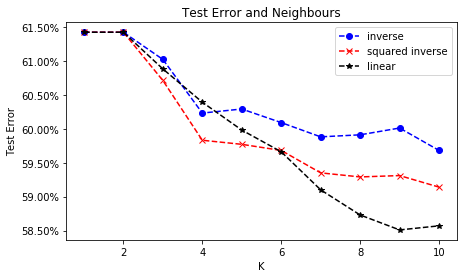

In [48]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

inverse_w,=plt.plot(neighbours,test_error_inverse_weight,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
sq_inverse_w,=plt.plot(neighbours,test_error_inverse_squared_weight,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
linear_w,=plt.plot(neighbours,test_error_linear_weight,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([inverse_w,sq_inverse_w,linear_w],["inverse","squared inverse","linear"])

## Combine both optimal

In [56]:
test_error_linear_weight_cosine=[]
for i in range(6,12):
    knn = KNeighborsClassifier(n_neighbors=i,weights=linear_weight,metric='cosine')
    knn.fit(x_train_transformed_90, y_train)
    y_pred = knn.predict(x_test_transformed_90)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_linear_weight_cosine.append(test_scores)
print(test_error_linear_weight_cosine)

[0.5496, 0.5448, 0.5399, 0.5375, 0.5353, 0.5321]


Text(0,0.5,'Test Error')

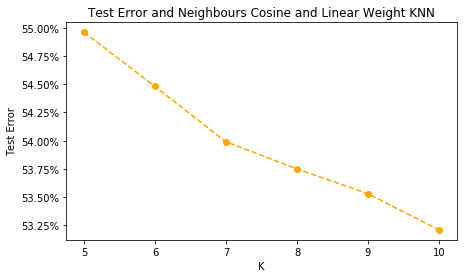

In [156]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(5,11),test_error_linear_weight_cosine,color='orange',linestyle='dashed',marker='o',
        markerfacecolor='orange',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours Cosine and Linear Weight KNN')
plt.xlabel('K')
plt.ylabel('Test Error')



In [75]:
start=time.time()
knn = KNeighborsClassifier(n_neighbors=i,weights=linear_weight,metric='cosine')
knn.fit(x_train_transformed_90, y_train)
y_pred = knn.predict(x_test_transformed_90)
test_scores = 1 - accuracy_score(y_test, y_pred)
test_error_linear_weight_cosine.append(test_scores)
end=time.time()
print(end-start)

14.649308919906616


# NLC

In [49]:
import math
import operator
import numpy.linalg as LA
import time

In [50]:
def euclideanDistance(instance1, instance2):
 
    return LA.norm(instance1 - instance2)

In [51]:
def getCentroid(arr):
    length = arr.shape[0] # num of points
    return arr.sum(0) / length

In [52]:
def fit(x_train, y_train):
    classes = set(y_train)
    numClass = len(classes)
    class_train = {}
    for i in range(len(x_train)):
        key = y_train[i]
        value = x_train[i]
        if key not in class_train.keys():
            class_train[key] = []
        class_train[key].append(value)
    return class_train

In [53]:
def predict(class_train, x_test, k):
    predictions = []
    keys = class_train.keys()
    
    for x in x_test:
        class_dist = [] # to store [ key, centroid_dist]
        for key in keys:
            value = np.array(class_train[key])
            distances = LA.norm(x - value, axis = 1)           
            idx = np.argsort(distances)
            # use k nearest neighbors to find centroid point and calculate centroid dist through eculideanDistance
            kNearestNeighbors = value[idx[0:k]]
            
            centroid = getCentroid( kNearestNeighbors )
            centroid_dist = LA.norm(centroid - x) 
            
            # add centroid_dist to class_dist (for sorting)
            class_dist.append ( [key, centroid_dist] )
        
        # sort centroid_dist of x
        #class_dist.sort(key=operator.itemgetter(1))
        class_dist = np.array(class_dist)
        rsp_idx = np.argsort(class_dist[:,1])
        # predict y result for x
        #predictions.append(class_dist[0][0])
        predictions.append(class_dist[rsp_idx[0]][0])
             
    return predictions


In [54]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [55]:
test_error_kCentroid = []
for k in range(7,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_90, y_train)

    trainTime = time. time()

    y_pred = predict(c_train, x_test_transformed_90[:], k)

  

    predictTime = time. time()

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid.append(test_scores)
    
    end = time. time()

    #print("time for k = ",k," is: ", end - start)
    
print(test_error_kCentroid)

[0.5248999999999999, 0.5199, 0.516, 0.5173]


In [166]:
test_error_kCentroid=[0.5248999999999999, 0.5199, 0.516, 0.5173]

Text(0,0.5,'Test Error')

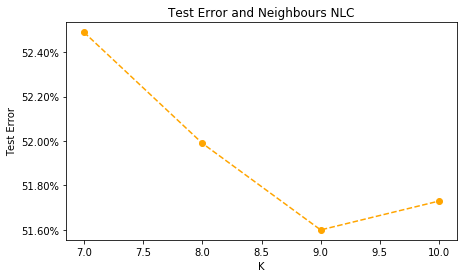

In [167]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(7,11),test_error_kCentroid,color='orange',linestyle='dashed',marker='o',
        markerfacecolor='orange',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours NLC')
plt.xlabel('K')
plt.ylabel('Test Error')

In [73]:
start = time. time()
c_train = fit(x_train_transformed_90, y_train)
trainTime = time. time()
y_pred = predict(c_train, x_test_transformed_90[:], 9)
predictTime = time. time()
test_scores = 1 - accuracy_score(y_test[:], y_pred)
test_error_kCentroid.append(test_scores)
end = time. time()
print(end-start)

310.4756190776825


In [157]:
acc_data=[0.462, 0.468,0.484, 0.406,0.77]

In [158]:
acc_data=pd.DataFrame(acc_data, columns=['Best Accuracy'], index=['SVM','KNN','NLC','Logstic Regression','CNN'])

In [159]:
acc_data['Best Accuracy'] = pd.Series(["{0:.1f}%".format(val * 100) for val in acc_data['Best Accuracy']], index = acc_data.index)

In [160]:
acc_data

,Best Accuracy
SVM,46.2%
KNN,46.8%
NLC,48.4%
Logstic Regression,40.6%
CNN,77.0%


In [161]:
time_data=[1432.3, 14.7,310.5, 27.4,7199]

In [162]:
time_data=pd.DataFrame(time_data,columns=['Computation time(seconds)'],index=['SVM','KNN','NLC','Logstic Regression','CNN'])

In [163]:
time_data

,Computation time(seconds)
SVM,1432.3
KNN,14.7
NLC,310.5
Logstic Regression,27.4
CNN,7199.0


In [164]:
pd.concat([acc_data, time_data], axis=1)

,Best Accuracy,Computation time(seconds)
SVM,46.2%,1432.3
KNN,46.8%,14.7
NLC,48.4%,310.5
Logstic Regression,40.6%,27.4
CNN,77.0%,7199.0
